## Machine Learning Assignment 5
## CS 430
## Ashley Ridley

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Aquire the data

In [5]:
landsat_train=pd.read_csv('/content/drive/MyDrive/landsat_train.csv')
landsat_test=pd.read_csv('/content/drive/MyDrive/landsat_test.csv')
bank_note=pd.read_csv('/content/drive/MyDrive/Assignment 3/banknote_authentication.csv')

## Statistics and Visaul Exploration

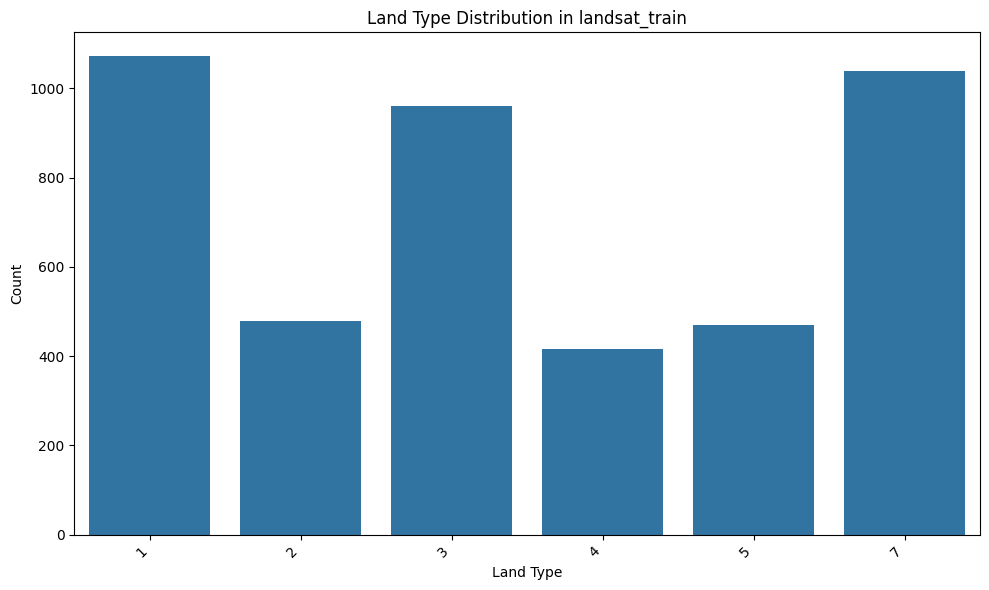

In [6]:
# Bar plot for landsat_train
plt.figure(figsize=(10, 6))
sns.countplot(x='land_type', data=landsat_train)
plt.title('Land Type Distribution in landsat_train')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

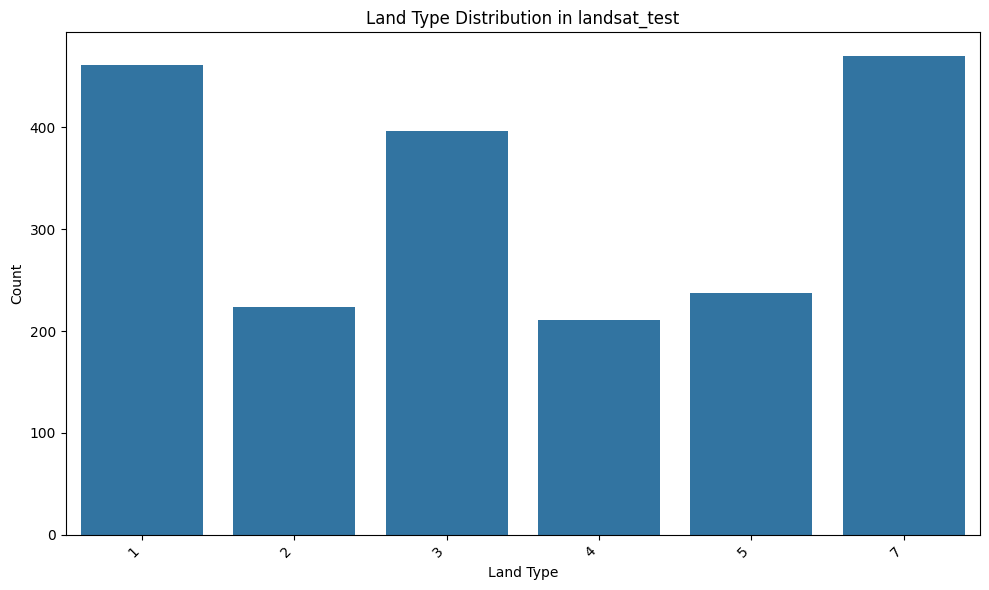

In [7]:
# Bar plot for landsat_test
plt.figure(figsize=(10, 6))
sns.countplot(x='land_type', data=landsat_test)
plt.title('Land Type Distribution in landsat_test')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## splitting the data

In [8]:
# Create X_train and X_test
X_train = landsat_train.drop('land_type', axis=1)
X_test = landsat_test.drop('land_type', axis=1)

# Create y_train and y_test
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

## Building the Pipeline

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

# Create the column transformer
num_features = X_train.select_dtypes(include=['number']).columns  # Select numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_features),
    ],
    remainder='passthrough'  # Keep other columns unchanged
)


In [10]:
# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)),  # Add random_state for reproducibility
])

## Executing the Model

In [11]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'mi...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Evaluating the model

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.99      0.97      0.98       224
           3       0.89      0.95      0.92       397
           4       0.77      0.64      0.70       211
           5       0.92      0.91      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



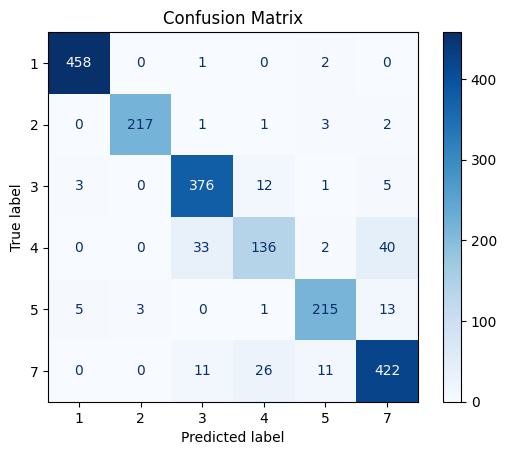

In [12]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
cm = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap='Blues')
cm.ax_.set_title('Confusion Matrix')
plt.show()

## Conclusion
Overall the model is good for prediciting land type. The accuracy score is 91% which is fairly high. All precision scores for each land type we fairly accurate except for land type 4 which only had a 77% acccuracy.